In [1]:
%run ~/Normal_for_DSS.py

/usr/local/lib64/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


In [2]:
from keras.models import load_model
from keras.utils import np_utils

In [3]:
"""important!!! put your model here"""
"""important!!! put your model here"""
"""important!!! put your model here"""
"""important!!! put your model here"""

#put your model here
model = load_model("/home/ec2-user/image/basic_diff_seed.hdf5")

/usr/local/lib64/python2.7/site-packages/keras/models.py:281: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [4]:
#read all.csv and treat!!
df = pd.read_csv("/home/ec2-user/datas/all.csv")
df.drop('Unnamed: 0', axis=1, inplace=True) # 쓸데없는 컬럼 drop
df_train = df[df.Usage == 'Training'] # Training이라고 라벨되어있는 항목만 가져오기
X_train = np.array(df_train.iloc[:, 2:]).astype('float32') / 255. # float 타입 변경, scaling
X_train = X_train.reshape(28709, 48, 48, 1) # 입력형태에 맞게 reshape
y_train = np.array(df_train.iloc[:, 0]) # y는 1차원이고 카테고리값이라 scaling 필요없음


df_test = df[df.Usage == 'PrivateTest'] # 교차검증용 테스트셋
X_test = np.array(df_test.iloc[:, 2:]).astype('float32') / 255.
X_test = X_test.reshape(3589, 48, 48, 1)
y_test = np.array(df_test.iloc[:, 0])
Y_train = np_utils.to_categorical(y_train, 7) # 원핫인코딩
Y_test = np_utils.to_categorical(y_test, 7)

#for the public tsstset
df_pubtest = df[df.Usage == "PublicTest"]
X_pubtest = np.array(df_pubtest.iloc[:,2:]).astype("float32") / 255.
X_pubtest = X_pubtest.reshape(-1,48,48,1)
y_pubtest = np.array(df_pubtest.iloc[:,0])
Y_pubtrain = np_utils.to_categorical(y_train,7)
Y_pubtest = np_utils.to_categorical(y_pubtest,7)

In [5]:
# do predict!!
pred_y = model.predict_classes(X_test)
"""
there`sf two test file X_test is private test set, X_pubtest is public test set.
"""



3584/3589 [============================>.] - ETA: 0s

'\nthere`sf two test file X_test is private test set, X_pubtest is public test set.\n'

In [88]:
# make dataframe and values!!
# Tr => list of true index , Fa => list of False index , Al = all index
fin = pd.DataFrame({"pred_y":pred_y,"test_y":y_test,"ind":range(len(pred_y))})

T = fin.pred_y == fin.test_y
F = fin.pred_y != fin.test_y

fin_g = fin.ind.groupby([fin.pred_y, fin.test_y]).count().unstack()
fin_g = fin_g.fillna(0)

fin_gn = pd.get_dummies(fin_g)

for i in range(7):
    fin_gn.iloc[:,i] = fin_g.iloc[:,i]/fin_g.iloc[:,i].sum()
fin_g.iloc[:,:].sum(axis=1)

fin_gd = pd.DataFrame([0,0,0,0,0,0,0])
for i in range(7):
    fin_gd.iloc[i] = fin_g.iloc[i,i]

fin_gg = pd.get_dummies(fin_g)
for i in range(7):
    fin_gg.iloc[i,i] = 0
    

In [89]:
fin_gg

test_y,0,1,2,3,4,5,6
pred_y,,,,,,,
0,0.0,24.0,78.0,28.0,54.0,19.0,44.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,46.0,6.0,0.0,16.0,40.0,49.0,22.0
3,31.0,2.0,34.0,0.0,34.0,29.0,33.0
4,105.0,9.0,146.0,62.0,0.0,20.0,153.0
5,6.0,2.0,39.0,13.0,6.0,0.0,10.0
6,47.0,1.0,54.0,33.0,100.0,18.0,0.0


In [91]:
fin_gg.iloc[0]

test_y
0     0.0
1    24.0
2    78.0
3    28.0
4    54.0
5    19.0
6    44.0
Name: 0, dtype: float64

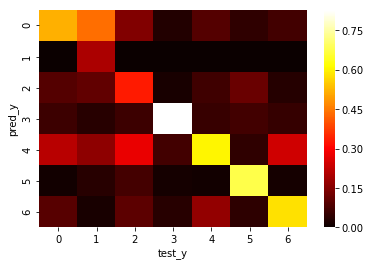

In [50]:

plt.show()

In [71]:
co = ["r","b","k","y","r","b","k"]

In [165]:
def result_show0():
    plt.figure(figsize=(16,36))
    
    plt.subplot(5,2,1)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index,fin_g.iloc[:,:].sum(axis=0).values,color=ac)
    plt.title("Total real number of each category", size = 20)
    plt.ylabel("Num",size=20)
    plt.xlabel("Category", size = 20)
    
    plt.subplot(5,2,2)
    plt.bar(fin_g.iloc[:,:].sum(axis=1).index, fin_g.iloc[:,:].sum(axis=1).values,color=ac)
    plt.title("Total predicted number of each categoryr",size=20)
    plt.xlabel("Category", size = 20)
    plt.ylabel("Num", size=20)
    
    
    
    plt.subplot(5,2,3)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, fin_g.iloc[:,:].sum(axis=0).values,color=ac2)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, fin_gd.values ,color=ac) 
    plt.title("Prediction True number vs tot number",size=20)
    plt.xlabel("Category", size = 20)
    plt.ylabel("Num", size=20)
    
    plt.subplot(5,2,4)
    plt.bar(fin_g.iloc[:,:].sum(axis=1).index, fin_g.iloc[:,:].sum(axis=1).values,color=ac2)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, fin_gd.values ,color=ac) 
    plt.title("Prediction True number vs tot number",size=20)
    plt.xlabel("Category", size = 20)
    plt.ylabel("Num", size=20)    
    
    
    plt.subplot(5,2,5)
    
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, [1,1,1,1,1,1,1], color=ac2)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, fin_gd.values.reshape(-1)/(fin_g.iloc[:,:].sum(axis=0).values),color=ac)
    plt.title("Recall ratio of each category", size = 20)
    plt.xlabel("Category",size=20)
    plt.ylabel("ratio",size=20)
   
    plt.subplot(5,2,6)
    
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, [1,1,1,1,1,1,1], color=ac2)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, fin_gd.values.reshape(-1)/(fin_g.iloc[:,:].sum(axis=1).values),color=ac)
    plt.title("Precision ratio of each category", size = 20)
    plt.xlabel("Category",size=20)
    plt.ylabel("ratio",size=20)  
    
    plt.subplot(5,2,7)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index,fin_g.iloc[:,:].sum(axis=0).values,color=ac,width=0.9)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, fin_gd.values ,color=ac)
    asdd = fin_gd.values.reshape(-1) 
    for i in range(7):
        plt.bar(fin_g.iloc[:,:].sum(axis=0).index, fin_gg.iloc[i],color=ac[i],bottom=asdd)
        asdd = asdd + fin_gg.iloc[i].values
    plt.title("Predicted category numbers in each real category", size = 20)
    plt.xlabel("Category",size=20)
    plt.ylabel("Num",size=20)    
    
    
    plt.subplot(5,2,8)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index,fin_g.iloc[:,:].sum(axis=1).values,color=ac,width=0.9)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, fin_gd.values ,color=ac)
    asdd = fin_gd.values.reshape(-1) 
    for i in range(7):
        plt.bar(fin_g.iloc[:,:].sum(axis=0).index, fin_gg.iloc[:,i],color=ac[i],bottom=asdd)
        asdd = asdd + fin_gg.iloc[:,i].values
    plt.title("Each real category numbers in predicted category"  , size = 20)
    plt.xlabel("Category",size=20)
    plt.ylabel("Num",size=20) 
    
    plt.subplot(5,2,9)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, [1,1,1,1,1,1,1], color=ac, width = 0.9)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, fin_gd.values.reshape(-1)/fin_g.iloc[:,:].sum(axis=0).values ,color=ac)
    asdd = fin_gd.values.reshape(-1) / fin_g.iloc[:,:].sum(axis=0).values
    for i in range(7):
        plt.bar(fin_g.iloc[:,:].sum(axis=0).index, fin_gg.iloc[i]/fin_g.iloc[:,:].sum(axis=0).values,color=ac[i],bottom=asdd)
        asdd = asdd + fin_gg.iloc[i].values /fin_g.iloc[:,:].sum(axis=0).values 
    plt.title("Predicted category ratio in each real category", size = 20)
    plt.xlabel("Category",size=20)
    plt.ylabel("Num",size=20)    
    
        
    plt.subplot(5,2,10)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, [1,1,1,1,1,1,1], color=ac, width = 0.9)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, fin_gd.values.reshape(-1)/fin_g.iloc[:,:].sum(axis=1).values ,color=ac)
    asdd = fin_gd.values.reshape(-1) / fin_g.iloc[:,:].sum(axis=1).values
    for i in range(7):
        plt.bar(fin_g.iloc[:,:].sum(axis=0).index, fin_gg.iloc[:,i]/fin_g.iloc[:,:].sum(axis=1).values,color=ac[i],bottom=asdd)
        asdd = asdd + fin_gg.iloc[:,i].values /fin_g.iloc[:,:].sum(axis=1).values 
    
    plt.title("Each real category ratio in predicted category"  , size = 20)
    plt.xlabel("Category",size=20)
    plt.ylabel("Num",size=20) 
    
    plt.tight_layout()
    plt.show() 
        
ac = np.array([(0.9,0.1,0.2),(0.5,0.,0.7),(0.1,0.6, 0.2),(0.9,0.9,0.2),(0.,0.,0.8),(0., 0.7,  0.7),(0.6,0.6,0.6)])
ac1 = ac /2
ac2 = np.array([(0.95, 0.7, 0.75), (0.8, 0.7, 0.9), (0.55, 1., 0.65), (0.92, 0.92, 0.6),(0.6,0.6,1.), (0.6, 0.85, 0.85), (0.8,0.8,0.8)])


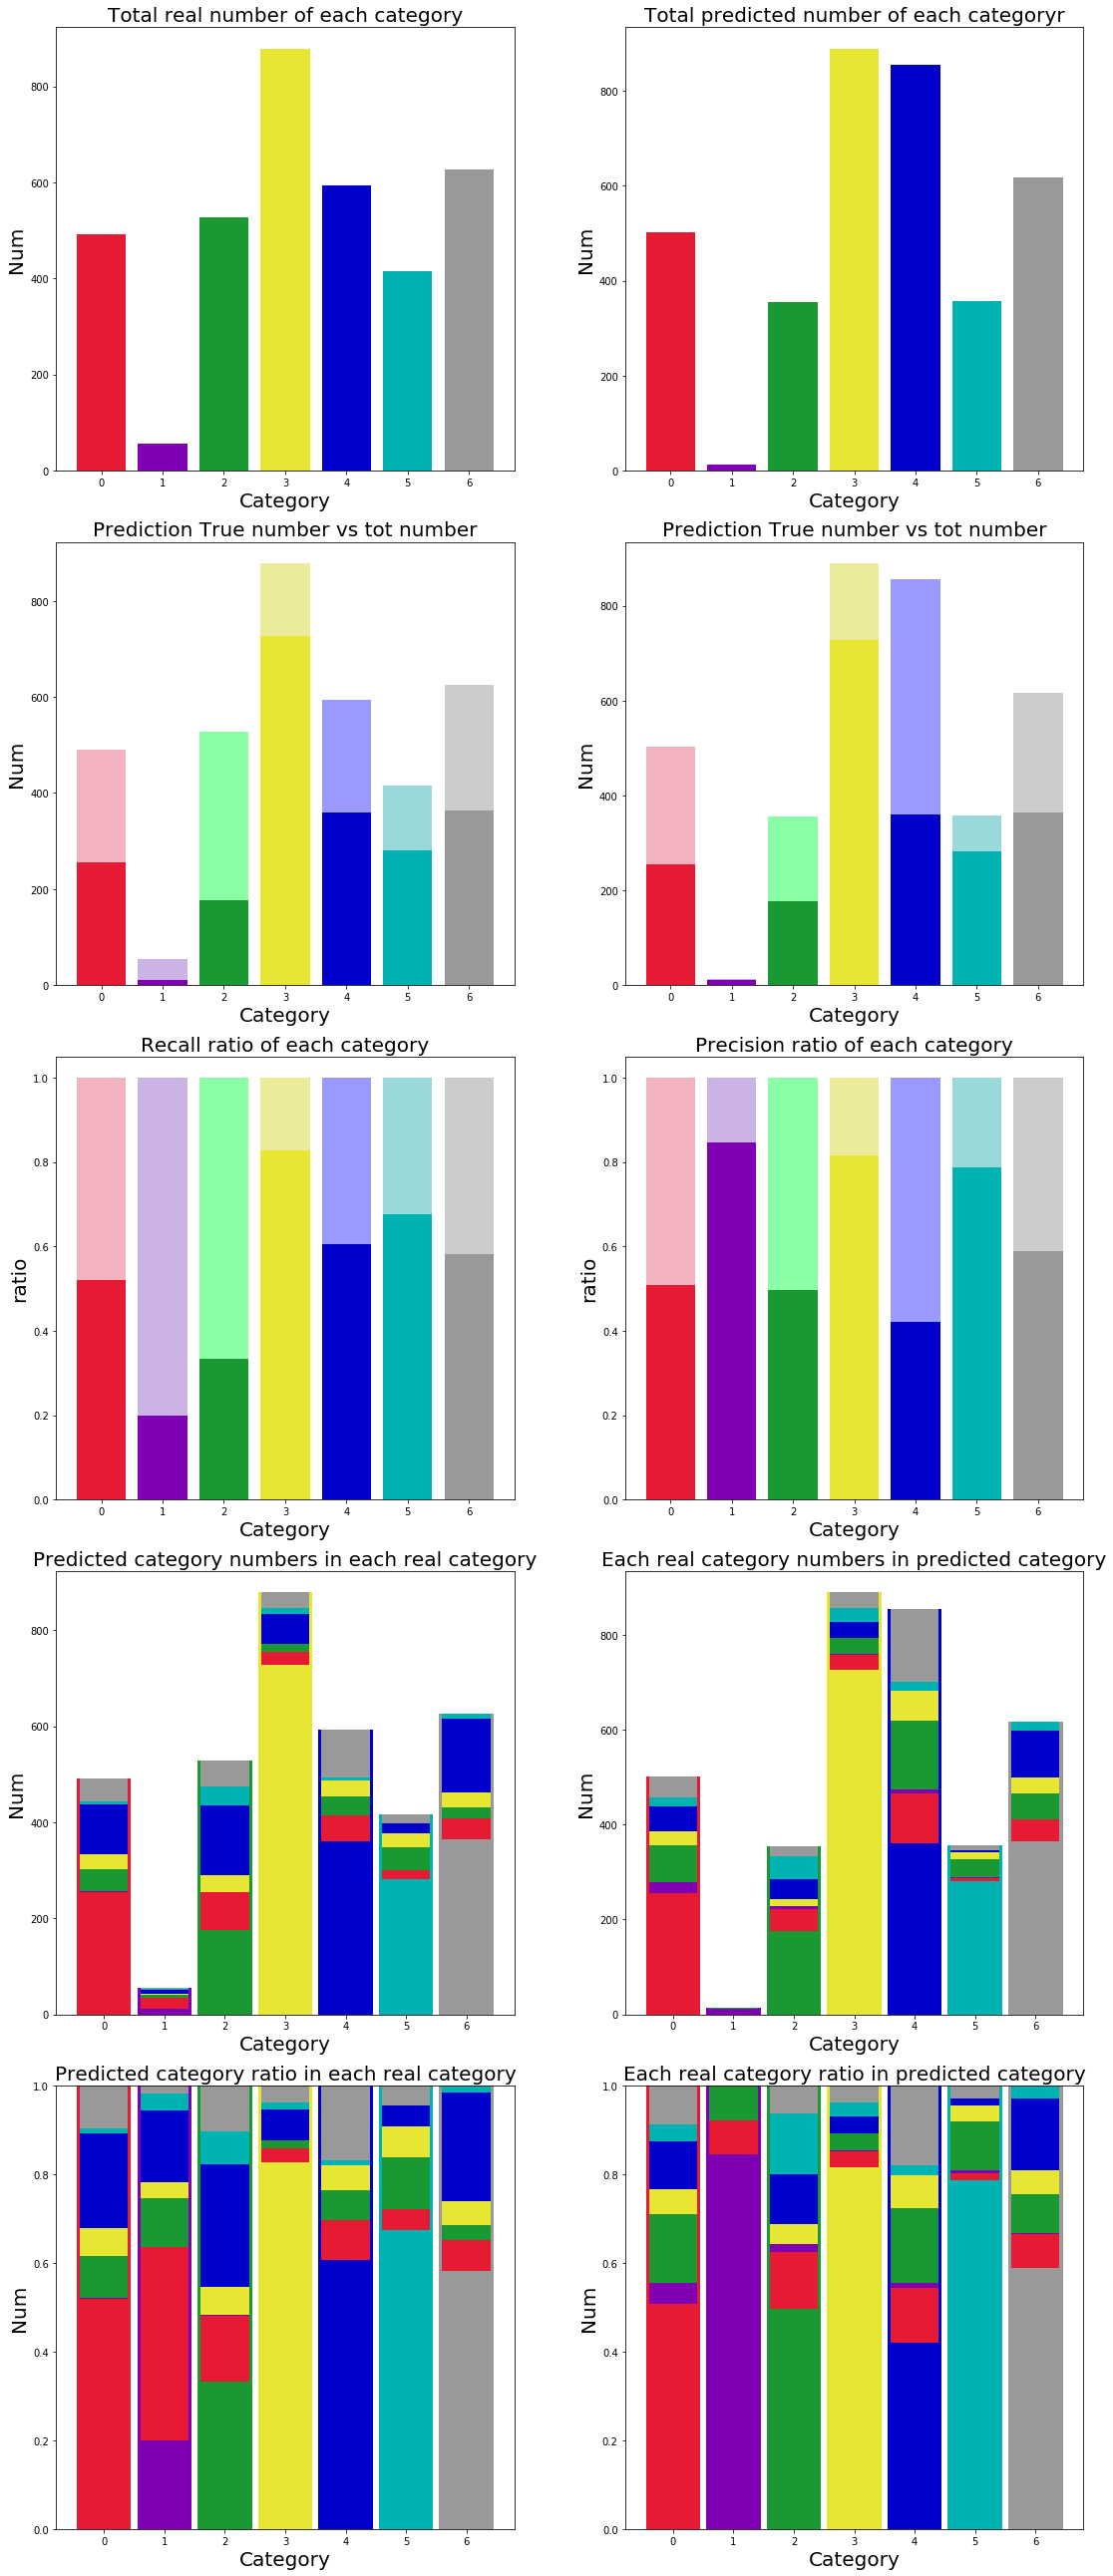

In [166]:
result_show0()

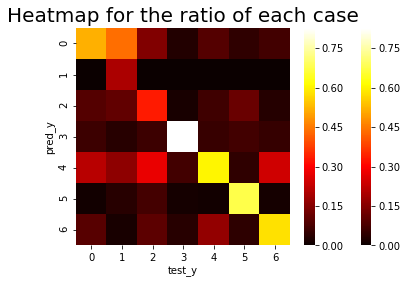

In [63]:
sns.heatmap(fin_gn,cmap="hot")
plt.title("Heatmap for the ratio of each case", size = 20)
plt.show()

In [ ]:
#RGB color map!!!
zzz = np.arange(100)/100.
xx,yy = np.meshgrid(zzz,zzz)
rr_ = xx.reshape(-1)
gg_ = yy.reshape(-1)
def draw_rgbb (float):
    bb_ = np.ones_like(gg_) * flaot
    col = np.dstack((rr_,gg_,bb_)).reshape(-1,3)
    plt.scatter(rr_,gg_,c=col)
    plt.show()
    
def draw_rgbb_ (floatt):
    bb_ = np.ones_like(gg_) * floatt
    col = np.dstack((rr_,gg_,bb_)).reshape(-1,3)
    plt.scatter(rr_,gg_,c=col)

def draw_rgbb_n ( n):
    plt.figure(figsize = (5, 5*(n+1)))
    for i in range(n+1):
        plt.subplot(n+1,1,i+1)
        draw_rgbb_(i / float(n) )
    plt.show()

draw_rgbb_n(10)